# How do Transformers work?

在本节中，我们将探讨 Transformer 模型的架构，并更深入地了解**注意力机制**、**编码器** - **解码器架构**等概念。

## Transformers are language models

上述所有 Transformer 模型（GPT、BERT、T5 等）都是作为语言模型进行训练的。这意味着它们是在大量原始文本上以自监督的方式进行训练的。

自监督学习是一种训练类型，其目标是从模型的输入中自动计算得出。这意味着无需人类为数据进行标注！

这种类型的模型会对它所训练的语言形成一种统计上的理解，但对于具体的实用任务来说用处不大。正因为如此，通用的预训练模型会经历一个被称为**迁移学习**或 **微调(fine-tuned)** 的过程。在这个过程中，模型会在监督学习的条件下——即使用人工标注的标签——针对给定的任务进行微调。

一个任务示例是在读取了前 n 个单词后预测句子中的下一个单词。这被称为因果语言模型，因为输出取决于过去和当前的输入，但不取决于未来的输入。


另一个例子是掩码语言模型，在这种模型中，模型会预测句子中被掩码的单词。

## Transformers are big models

除了少数例外情况（比如 DistilBERT），提高性能的一般策略是增大模型的规模以及它们在预训练阶段所使用的数据量。

不幸的是，训练一个模型，尤其是大型模型，需要大量的数据。这在时间和计算资源方面会变得非常昂贵。甚至还会对环境造成影响，如下图所示。

这展示了一个由团队主导的（规模非常大的）模型项目，该团队有意识地试图降低预训练对环境的影响。而为了找到最佳超参数而进行大量试验所产生的碳足迹会更高。

试想一下，如果每次有研究团队、学生组织或者公司想要训练一个模型时，都从零开始，这将会导致全球范围内产生巨大的、不必要的成本！

这就是为什么共享语言模型至关重要：共享训练好的权重并在已训练好的权重基础上进行构建，能够降低整个社区的计算成本和碳排放量。

顺便说一下，您可以通过多种工具评估模型训练的碳足迹。例如 ML CO2 Impact 或集成在 🤗 Transformers 中的 Code Carbon。若想了解更多相关内容，您可以阅读这篇博客文章，它将向您展示如何生成一个包含您训练过程碳足迹估算的 emissions.csv 文件，以及 🤗 Transformers 文档中关于此主题的介绍。

## Transfer Learning

预训练是指从零开始训练模型：权重随机初始化，训练过程不依赖任何先验知识。

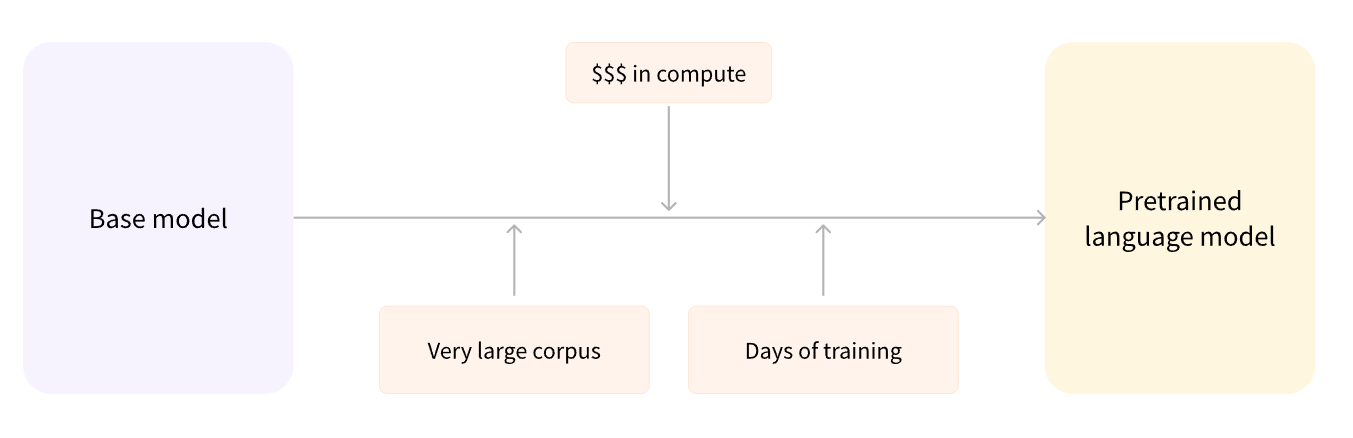

这种预训练通常是在非常大量的数据上进行的。因此，它需要一个非常庞大的数据集，而且训练可能需要长达数周的时间。

另一方面，微调是在模型经过预训练之后进行的训练。要进行微调，您首先获取一个预训练的语言模型，然后使用特定于您任务的数据集进行额外的训练。等等——为什么不从一开始就针对最终用例训练模型（从零开始）呢？有以下几个原因：

- 预训练模型已经在与微调数据集有一定相似性的数据集上进行了训练。因此，微调过程能够利用初始模型在预训练期间获得的知识（例如，在自然语言处理问题中，预训练模型会对您任务所使用的语言有一定的统计理解）。
- 由于预训练模型已经在大量数据上进行了训练，因此微调只需要少量数据就能获得不错的结果。
- 出于同样的原因，获得良好结果所需的时间和资源要少得多。
- 
例如，可以利用一个在英语语言上训练好的预训练模型，然后在 arXiv 文档库上对其进行微调，从而得到一个基于科学/研究的模型。微调只需要少量的数据：预训练模型所获取的知识被“迁移”过来，这就是“迁移学习”这一术语的由来。


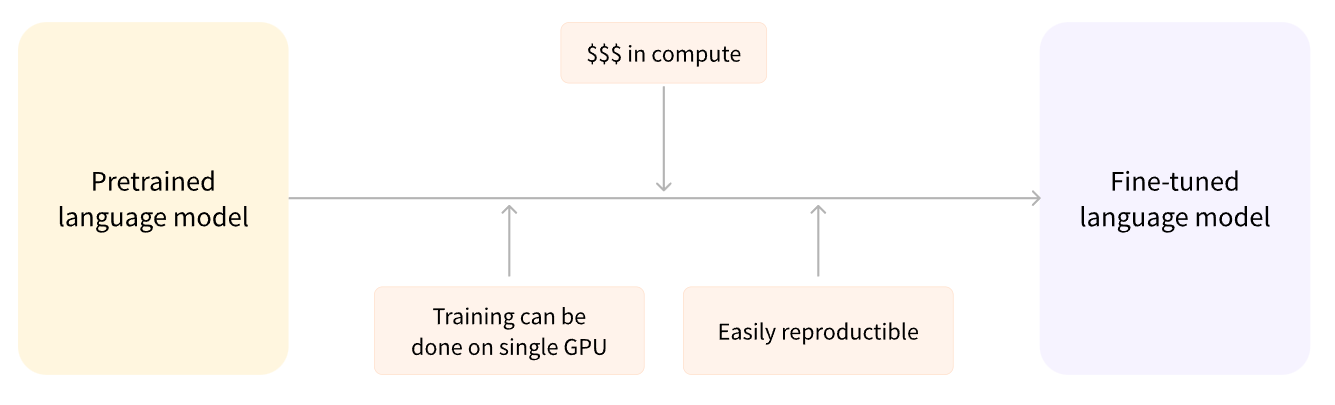

因此，微调模型所需的时间、数据、资金和环境成本更低。由于训练的限制比完整的预训练要少，所以对不同的微调方案进行迭代也更快、更容易。


这一过程也会比从头开始训练取得更好的效果（除非您有大量的数据），这就是为什么您应该始终尝试利用一个预训练模型——一个尽可能接近您手头任务的模型——并对其进行微调。


## General Transformer architecture

在本节中，我们将概述 Transformer 模型的总体架构。如果您对某些概念不太理解，也无需担心，后面会有详细介绍每个组件的章节。

该模型主要由两个模块组成：

- 编码器（左）：编码器接收输入并构建其表示（其特征）。这意味着模型被优化以从输入中获取理解。
- 解码器（右侧）：解码器利用编码器的表示（特征）以及其他输入来生成目标序列。这意味着该模型经过优化以生成输出。

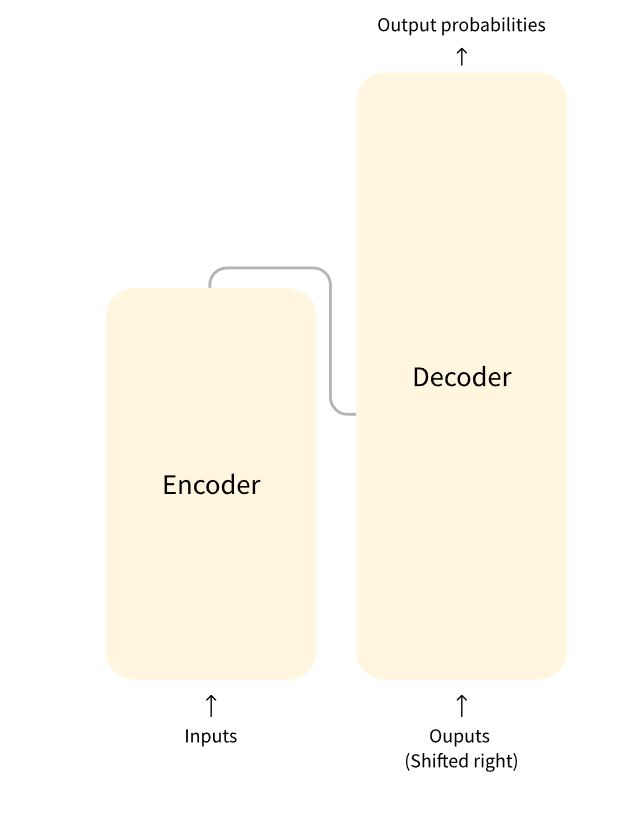

这些部分中的每一个都可以根据任务独立使用：
- 仅编码器模型：适用于需要理解输入的任务，例如句子分类和命名实体识别。
- 解码器模型：适用于文本生成等生成任务。
- 编码器 - 解码器模型或序列到序列模型：适用于需要输入的生成任务，例如翻译或摘要。

我们将在后面的章节中分别探讨这些架构

## Attention layers

Transformer 模型的一个关键特性在于其采用了被称为注意力层的特殊层。实际上，介绍 Transformer 架构的论文标题就是“Attention Is All You Need”!”我们将在课程的后续部分详细探讨注意力层；目前，您只需要知道，当处理您传递给它的句子中每个词的表示时，这一层会让模型对某些特定的词给予特别关注（而对其他词则或多或少地忽略）。

为了更好地理解这一点，可以考虑将英语文本翻译成法语的任务。给定输入“你 喜欢 这门 课程”，翻译模型需要同时关注相邻的词“你”，以便正确翻译“喜欢”这个词，因为在法语中，动词“喜欢”的形式会根据主语的不同而变化。然而，句子中的其余部分对于翻译这个词并无帮助。同样，当翻译“这”时，模型也需要关注“课程”这个词，因为“这”的翻译会根据相关名词是阳性还是阴性而有所不同。同样，句子中的其他词对于翻译“课程”这个词也没有影响。对于更复杂的句子（以及更复杂的语法规则），模型可能需要特别关注句子中距离较远的词，以便正确翻译每个词。（即：当你翻译某个单词，需要给予其它词不同的 attention）

同样的概念适用于任何与自然语言相关的任务：**一个词本身具有意义，但其意义会受到上下文的深刻影响**，上下文可以是所研究的词之前或之后的任何其他词（或多个词）。

既然您已经对注意力层有了大致的了解，那我们就更深入地研究一下 Transformer 架构。

## The original architecture

Transformer 架构最初是为翻译而设计的。在训练过程中，编码器接收某种语言的输入（句子），而解码器接收相同句子的**目标语言版本**。在编码器中，注意力层可以使用句子中的所有单词（因为正如我们刚刚看到的，给定单词的翻译可能取决于其在句子中的前后内容）。然而，**解码器是按顺序工作的**，只能关注它已经翻译过的句子中的单词（也就是说，只能关注当前生成单词之前的单词）。例如，当我们预测出目标翻译的前三个单词时，将它们提供给解码器，解码器然后利用编码器的所有输入来尝试预测第四个单词。(即解码器利用编码器的输入和目前已经翻译好的单词来作预测)

在训练期间（此时模型能够获取目标句子）为加快速度，解码器会接收到整个目标，但不允许使用未来的单词（如果在预测位置 2 的单词时能够获取位置 2 的单词，那么问题就不难了！）。例如，在预测第四个单词时，注意力层只能获取位置 1 到 3 的单词。

最初的 Transformer 架构是这样的，编码器在左边，解码器在右边：

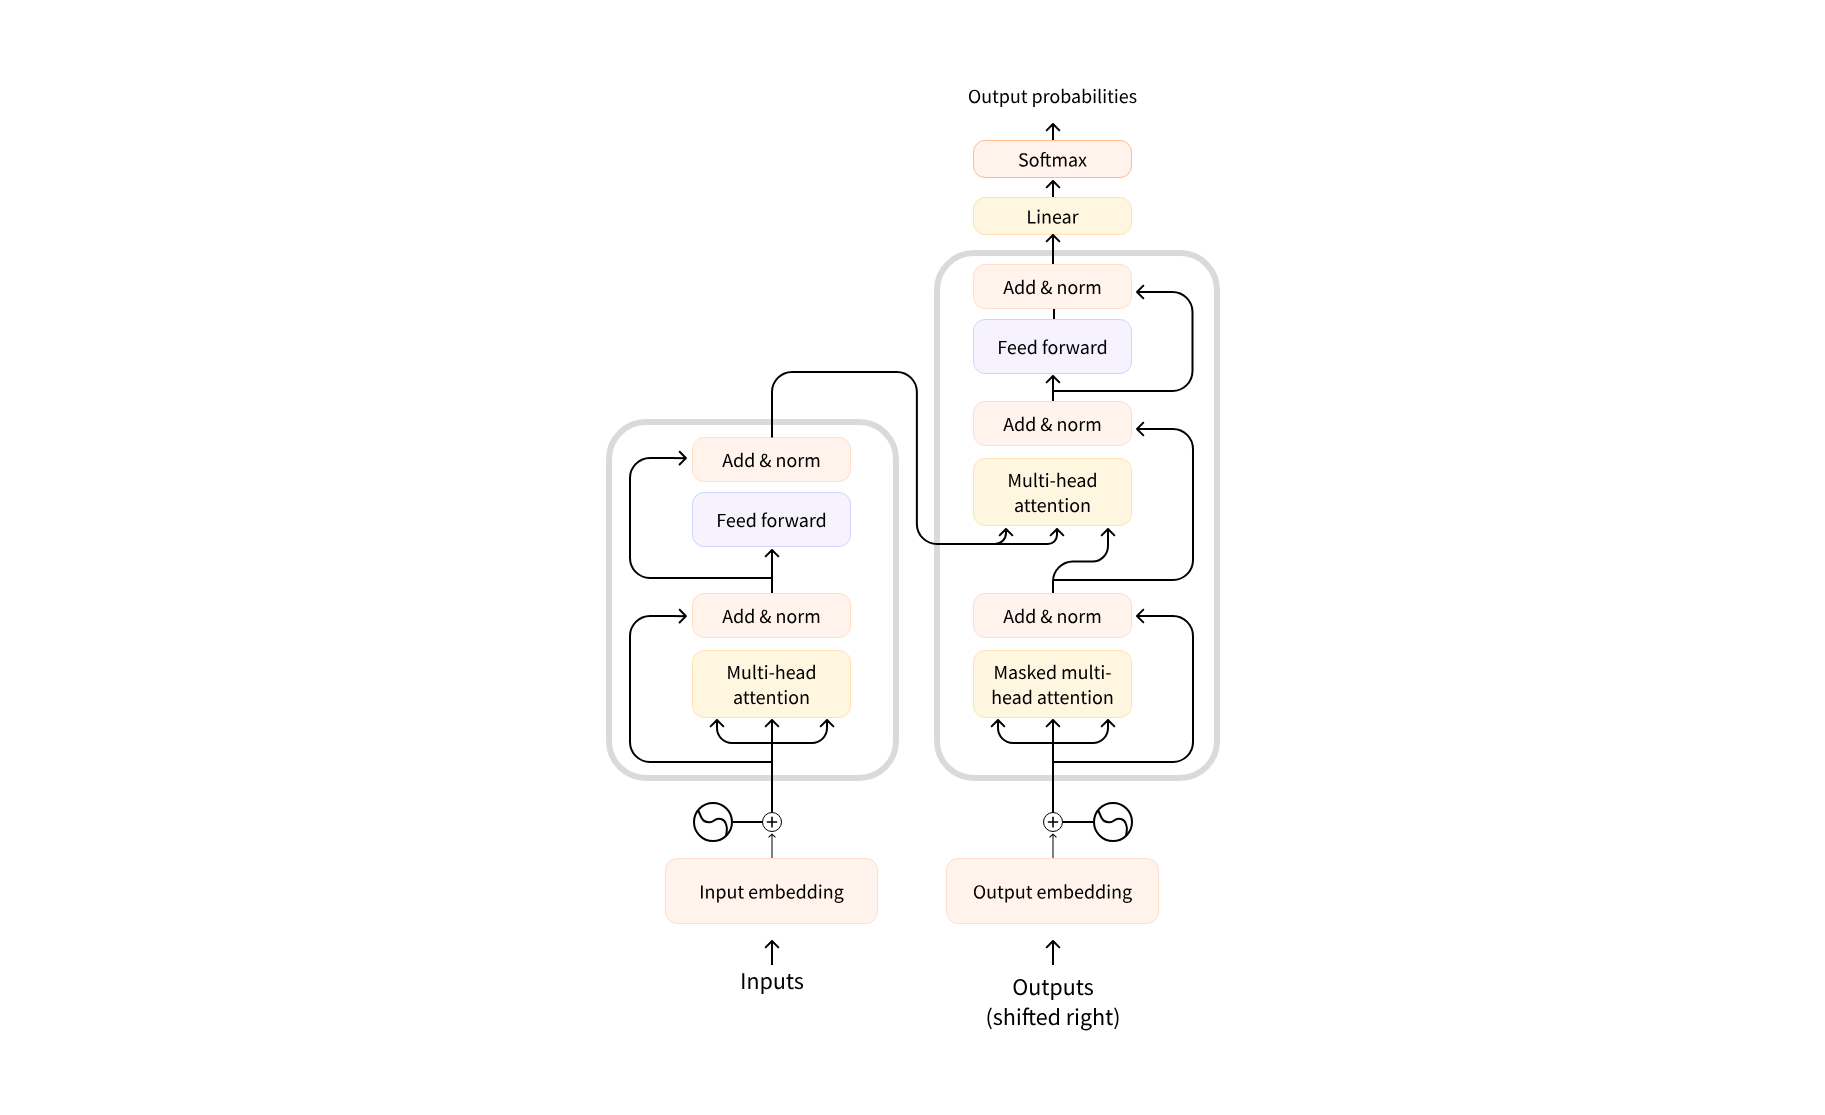

请注意，在解码器块中的**第一个注意力层会关注解码器的所有（过去）输入**，但**第二个注意力层使用编码器的输出**。因此，它能够访问整个输入句子，从而最好地预测当前单词。这非常有用，因为不同的语言可能有不同的语法规则，会将单词放在不同的顺序，或者句子后面提供的某些上下文可能有助于确定给定单词的最佳翻译。

注意力掩码也可用于编码器/解码器，以防止模型关注某些特殊词汇——例如，padding word。

## Architectures vs. checkpoints

在本课程深入探讨 Transformer 模型时，您会看到architectures、checkpoints以及models等术语。这些术语的含义略有不同：
- Architecture: 这是模型的框架——对模型中每一层以及每一层内所进行操作的定义。
- Checkpoints: 这些是在给定架构中将要加载的权重。
- Model: 这是一个涵盖范围较广的术语，不像“架构”或“检查点”那样精确：它既可以指架构，也可以指检查点。本课程在需要减少歧义时会明确指出是架构还是检查点

例如，BERT 是一种架构，而 bert-base-cased 是谷歌团队为 BERT 的首次发布训练的一组权重，是一个检查点。不过，人们可以说“BERT 模型”和“bert-base-cased 模型”。